In [10]:
import numpy as np
import matplotlib.pyplot as plt

이론

In [11]:
def f(x):
    return 3*x*np.exp(x)

x = 2.0
true = 3*np.exp(x)*(1+x) # 실제로 위 함수를 미분한 것
print(true) # x = 2.0 일 때, 실제 미분값

66.50150489037586


In [12]:
def my_deriv_forward(f, x):
    h = 1e-4
    value = (f(x+h)-f(x)) / h
    return value

def my_deriv_backward(f, x):
    h = 1e-4
    value = (f(x)-f(x-h)) / h
    return value

def my_deriv_centered(f, x):
    h = 1e-4
    value = (f(x+h)-f(x-h)) / (2*h)
    return value

def my_deriv_Richardson(f, x):
    h = 1e-4
    value = (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h)) / (12*h)
    return value

dydx_forward = my_deriv_forward(f, x)
print(dydx_forward)
print('dydx_forward error=', abs(dydx_forward-true))

dydx_backward = my_deriv_backward(f, x)
print(dydx_backward)
print('dydx_backward error=', abs(dydx_backward-true))

dydx_centered = my_deriv_centered(f, x)
print(dydx_centered)
print('dydx_centered error=', abs(dydx_centered-true))

dydx_Richardson = my_deriv_Richardson(f, x)
print(dydx_Richardson)
print('dydx_Richardson error=', abs(dydx_Richardson-true))

66.50593850892506
dydx_forward error= 0.004433618549199991
66.49707164143592
dydx_backward error= 0.004433248939932355
66.50150507518049
dydx_centered error= 1.84804633818203e-07
66.50150489048674
dydx_Richardson error= 1.1088729934272124e-10


In [13]:
# 함수 네 개를 하나로 합치고자 함.

def my_derivative(f, x, h=1e-4, method='central'): 
    # h와 method를 변수로 받되, 따로 지정을 안 해주면 디폴트 값으로 각각 1e-4, central로 하겠단 의미

    if method == 'central':
        return (f(x+h)-f(x-h)) / (2*h)
    
    elif method == 'forward':
        return (f(x+h)-f(x)) / h

    elif method == 'backward':
        return (f(x)-f(x-h)) / h

    elif method == 'richardson':
        return (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h)) / (12*h)

    else:
        raise ValueError("Method must be 'central', 'forward', 'backward', 'richardson'")
    
x = 2.0
dydx = my_derivative(f, x, 1e-4, method='richardson')
print(dydx)

66.50150489048674


In [14]:
from scipy.misc import derivative
# derivative(func, x0, dx=1.0, n=1, args=(), order=3)
# func: 함수, x0: 어디서 미분할 것인가, dx: h, n: 에러가 h의 몇 승인지

66.50150488951567
[0.         0.15789474 0.31578947 0.47368421 0.63157895 0.78947368
 0.94736842 1.10526316 1.26315789 1.42105263 1.57894737 1.73684211
 1.89473684 2.05263158 2.21052632 2.36842105 2.52631579 2.68421053
 2.84210526 3.        ]
[  3.00000001   4.06783332   5.41319024   7.09976748   9.20493235
  11.82253578  15.06628772  19.07380494  24.01146256  30.08020579
  37.52250848  46.63070064  57.75692985  71.32507166  87.84496437
 107.92941495 132.31450747 161.88384638 197.69748649 241.02644368]


C:\Users\jimin\AppData\Local\Temp\ipykernel_17272\3088832972.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx = derivative(f, 2.0, dx=1e-6)
C:\Users\jimin\AppData\Local\Temp\ipykernel_17272\3088832972.py:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx = derivative(f, x, dx=h)


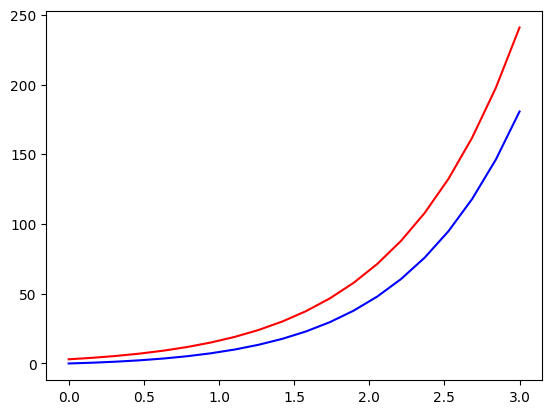

In [22]:
def f(x):
    return 3*x*np.exp(x)

dydx = derivative(f, 2.0, dx=1e-6)
print(dydx)

x = np.linspace(0, 3, 20)
y = f(x)
print(x)
plt.plot(x, y, c='b') # 미분하지 않은 그냥 함수 그래프

h = 1e-4
dydx = derivative(f, x, dx=h)
print(dydx)
plt.plot(x, dydx, c='r') # 각 점에서 미분값이 점점 증가함을 볼 수 있는 그래프

In [16]:
from scipy import optimize

실습

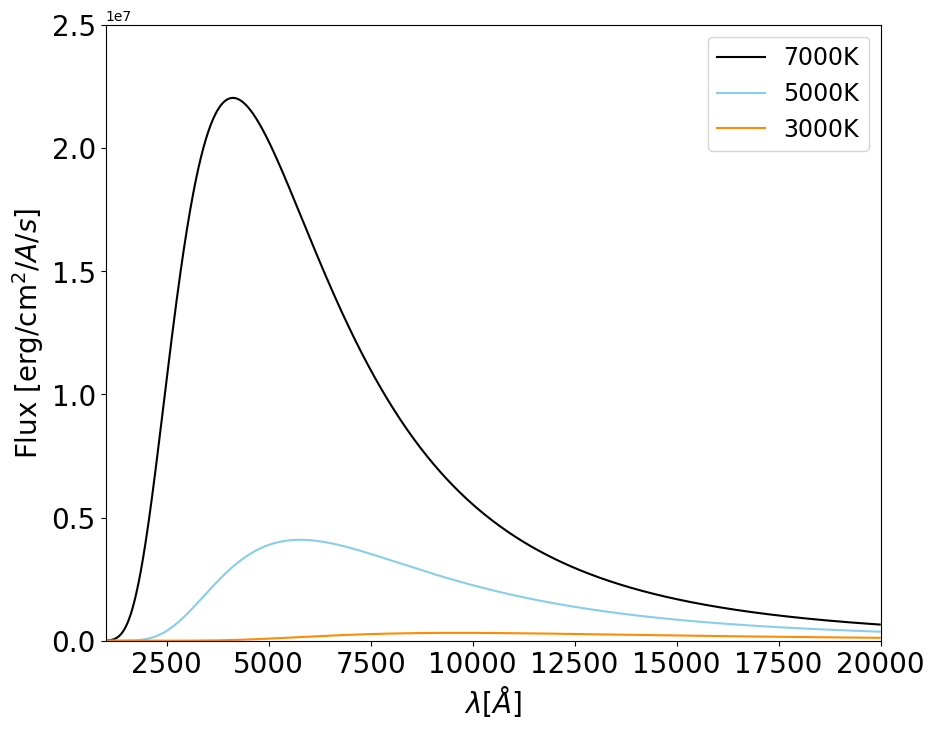

In [17]:
def my_planck(lamb_arr, T):
    c = 3.0e8
    kB = 1.382e-23
    h = 6.6e-34
    value = 2.*np.pi*h*c*c / (lamb_arr**5.0)
    value /= (np.exp(h*c/(lamb_arr*kB*T))-1.0)
    return value

plt.figure(figsize=(10,8))
T = [7000., 5000., 3000.]
color = ['black', 'skyblue', 'DarkOrange']
label = ['7000K', '5000K', '3000K']
lamb_arr = np.arange(1000.0*1e-10, 20000.*1e-10, 20e-10)

for i in range(len(T)):
    flux = my_planck(lamb_arr, T[i]) * 1e-7
    plt.plot(lamb_arr*1e10, flux, color = color[i], label = label[i])

ax=plt.gca()
ax.set_xlabel(r"$\lambda [\AA]$", fontsize=20)
ax.set_ylabel(r"Flux [erg/cm$^2/A/s]$", fontsize=20)
plt.xlim(1000,20000.)
plt.ylim(1e4, 2.5e7)
plt.xticks([2500,5000,7500,10000,12500,15000,17500,20000], fontsize=20)
plt.yticks([0,0.5e7,1.0e7,1.5e7,2.0e7,2.5e7], fontsize=20)
plt.legend(fontsize=17)


In [18]:
def f2(lamb_arr, T):
    h = 1e-10
    dydx = derivative(my_planck, lamb_arr, dx=h , args=(T,))
    return dydx

In [19]:
result21 = optimize.root_scalar(f2,bracket=[1000.0*1e-10,20000.0*1e-10],args=(7000.),method='brentq')
print(result21)
print('maximum wavelength: ',result21.root*1e10)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 11
           root: 4.122207761761697e-07
         method: brentq
maximum wavelength:  4122.207761761697


C:\Users\jimin\AppData\Local\Temp\ipykernel_17272\2474171628.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx = derivative(my_planck, lamb_arr, dx=h , args=(T,))


In [20]:
result22 = optimize.root_scalar(f2,bracket=[1000.0*1e-10,20000.0*1e-10],args=(5000.),method='brentq')
print(result22)
print('maximum wavelength: ',result22.root*1e10)

      converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 5.7710912105022e-07
         method: brentq
maximum wavelength:  5771.091210502201


C:\Users\jimin\AppData\Local\Temp\ipykernel_17272\2474171628.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx = derivative(my_planck, lamb_arr, dx=h , args=(T,))


In [21]:
result23 = optimize.root_scalar(f2,bracket=[1000.0*1e-10,20000.0*1e-10],args=(3000.),method='brentq')
print(result23)
print('maximum wavelength: ',result23.root*1e10)

      converged: True
           flag: converged
 function_calls: 12
     iterations: 11
           root: 9.61848453388025e-07
         method: brentq
maximum wavelength:  9618.484533880252


C:\Users\jimin\AppData\Local\Temp\ipykernel_17272\2474171628.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx = derivative(my_planck, lamb_arr, dx=h , args=(T,))
